<a href="https://colab.research.google.com/github/JapnoorManku/cpsc3620project/blob/main/cpsc3620proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from functools import lru_cache

# Simulated IsWord function using a dictionary lookup
word_dict = {"ARTIST": True, "OIL": True, "ART": True, "IS": True, "TOIL": True,
             "BOT": True, "HEART": True, "HAND": True, "SAT": True, "URNS": True, "PIN": True,
             "PIN": True, "START": True, "RAPS": True, "AND": True, "RAGS": True, "LAP": True}

def IsWord(word: str) -> bool:
    return word in word_dict

# (a) Compute the number of partitions of A into words
def count_partitions(A: str) -> int:
    n = len(A)
    dp = [0] * (n + 1)
    dp[0] = 1  # Base case: one way to split an empty string

    for i in range(1, n + 1):
        for j in range(i):
            if IsWord(A[j:i]):
                dp[i] += dp[j]

    return dp[n]

# (b) Decide whether A and B can be partitioned into words at the same indices
def can_partition_same_indices(A: str, B: str) -> bool:
    n = len(A)
    dp = [False] * (n + 1)
    dp[0] = True  # Base case

    for i in range(1, n + 1):
        for j in range(i):
            if IsWord(A[j:i]) and IsWord(B[j:i]) and dp[j]:
                dp[i] = True
                break

    return dp[n]

# (c) Compute the number of different ways that A and B can be partitioned into words at the same indices
def count_partition_same_indices(A: str, B: str) -> int:
    n = len(A)
    dp = [0] * (n + 1)
    dp[0] = 1  # Base case

    for i in range(1, n + 1):
        for j in range(i):
            if IsWord(A[j:i]) and IsWord(B[j:i]):
                dp[i] += dp[j]

    return dp[n]

# Example tests
A = "ARTISTOIL"
B1 = "BOTHEARTHANDSATURNSPIN"
B2 = "PINSTARTRAPSANDRAGSLAP"
print("(a) Count of partitions:", count_partitions(A))
print("(b) Can partition at same indices:", can_partition_same_indices(B1, B2))
print("(c) Count of same index partitions:", count_partition_same_indices(B1, B2))

(a) Count of partitions: 2
(b) Can partition at same indices: True
(c) Count of same index partitions: 1


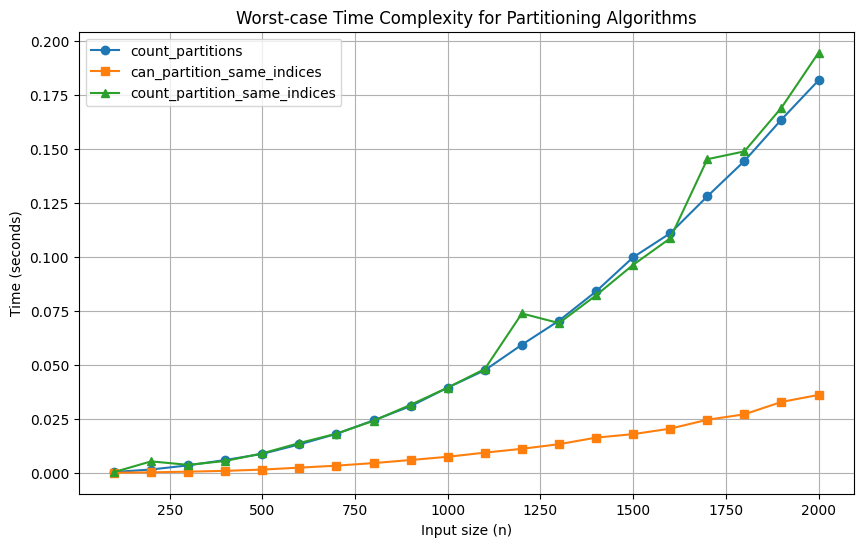

In [7]:
import time
import matplotlib.pyplot as plt

def count_partitions_worst(A: str) -> int:
    n = len(A)
    dp = [0] * (n + 1)
    dp[0] = 1
    for i in range(1, n + 1):
        for j in range(i):
            dp[i] += dp[j]
    return dp[n]

def can_partition_same_indices_worst(A: str, B: str) -> bool:
    n = len(A)
    dp = [False] * (n + 1)
    dp[0] = True  # Base case
    for i in range(1, n + 1):
        for j in range(i):
            if False:
                dp[i] = True
                break
    return dp[n]

def count_partition_same_indices_worst(A: str, B: str) -> int:
    n = len(A)
    dp = [0] * (n + 1)
    dp[0] = 1  # Base case
    for i in range(1, n + 1):
        for j in range(i):
            dp[i] += dp[j]
    return dp[n]

input_sizes = list(range(100, 2100, 100))
times_count_partitions = []
times_can_partition = []
times_count_partition = []

for n in input_sizes:
    A = "A" * n
    B = "B" * n

    start_time = time.perf_counter()
    _ = count_partitions_worst(A)
    end_time = time.perf_counter()
    times_count_partitions.append(end_time - start_time)

    start_time = time.perf_counter()
    _ = can_partition_same_indices_worst(A, B)
    end_time = time.perf_counter()
    times_can_partition.append(end_time - start_time)

    start_time = time.perf_counter()
    _ = count_partition_same_indices_worst(A, B)
    end_time = time.perf_counter()
    times_count_partition.append(end_time - start_time)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(input_sizes, times_count_partitions, marker='o', linestyle='-', label="count_partitions")
plt.plot(input_sizes, times_can_partition, marker='s', linestyle='-', label="can_partition_same_indices")
plt.plot(input_sizes, times_count_partition, marker='^', linestyle='-', label="count_partition_same_indices")
plt.xlabel("Input size (n)")
plt.ylabel("Time (seconds)")
plt.title("Worst-case Time Complexity for Partitioning Algorithms")
plt.legend()
plt.grid(True)
plt.show()


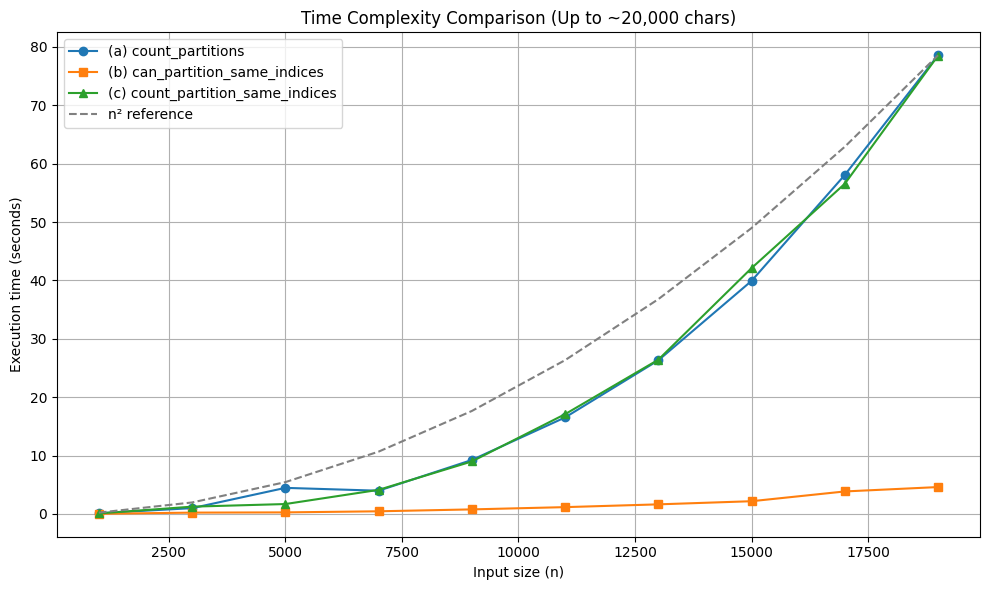

In [9]:
import time
import matplotlib.pyplot as plt

def count_partitions_worst(A: str) -> int:
    n = len(A)
    dp = [0] * (n + 1)
    dp[0] = 1
    for i in range(1, n + 1):
        for j in range(i):
            dp[i] += dp[j]
    return dp[n]

def can_partition_same_indices_worst(A: str, B: str) -> bool:
    n = len(A)
    dp = [False] * (n + 1)
    dp[0] = True
    for i in range(1, n + 1):
        for j in range(i):
            if False:  # simulate always failing
                dp[i] = True
                break
    return dp[n]

def count_partition_same_indices_worst(A: str, B: str) -> int:
    n = len(A)
    dp = [0] * (n + 1)
    dp[0] = 1
    for i in range(1, n + 1):
        for j in range(i):
            dp[i] += dp[j]
    return dp[n]

input_sizes = list(range(1000, 21000, 2000))
times_a = []
times_b = []
times_c = []

for n in input_sizes:
    A = "A" * n
    B = "B" * n

    start = time.perf_counter()
    count_partitions_worst(A)
    times_a.append(time.perf_counter() - start)

    start = time.perf_counter()
    can_partition_same_indices_worst(A, B)
    times_b.append(time.perf_counter() - start)

    start = time.perf_counter()
    count_partition_same_indices_worst(A, B)
    times_c.append(time.perf_counter() - start)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(input_sizes, times_a, 'o-', label="(a) count_partitions")
plt.plot(input_sizes, times_b, 's-', label="(b) can_partition_same_indices")
plt.plot(input_sizes, times_c, '^-', label="(c) count_partition_same_indices")

# Add a reference n^2 curve (normalized)
normalized_n2 = [((n ** 2) / (input_sizes[-1] ** 2)) * max(times_a) for n in input_sizes]
plt.plot(input_sizes, normalized_n2, '--', label="n² reference", color='gray')

plt.title("Time Complexity Comparison (Up to ~20,000 chars)")
plt.xlabel("Input size (n)")
plt.ylabel("Execution time (seconds)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
